In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
dataset = pd.read_csv("C:/Users/PUNEET/OneDrive/Desktop/Datasets-main/Loan Data/Loan_Data.csv")
dataset.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [12]:
from sklearn.impute import SimpleImputer # for filling missing values

In [21]:
dataset.select_dtypes(include = 'float64').columns

Index(['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
       'Credit_History'],
      dtype='object')

In [18]:
si = SimpleImputer(strategy = "mean")
ar = si.fit_transform(dataset[['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
       'Credit_History']])

In [19]:
new_data = pd.DataFrame(ar,columns = dataset.select_dtypes(include = 'float64').columns)
new_data.isnull().sum()

CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

In [20]:
new_data.head()

,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.0,146.412162,360.0,1.0
1,1508.0,128.000000,360.0,1.0
2,0.0,66.000000,360.0,1.0
3,2358.0,120.000000,360.0,1.0
4,0.0,141.000000,360.0,1.0


In [29]:
for i in dataset.select_dtypes(include = 'float64').columns:
    dataset[i].fillna(dataset[i].mean(),inplace = True)

C:\Users\PUNEET\AppData\Local\Temp\ipykernel_11488\3540199642.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[i].fillna(dataset[i].mean(),inplace = True)


In [71]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Property_area,Gender_Male,Married_Yes
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,2,1.0,0.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,0,1.0,1.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,2,1.0,1.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,2,1.0,1.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,2,1.0,0.0


 # Encoding

In [ ]:
dataset['Gender'].fillna(dataset['Gender'].mode()[0],inplace = True)
dataset['Married'].fillna(dataset['Married'].mode()[0],inplace = True)

In [40]:
encoding_data = dataset[['Gender','Married']] # feature Encoding like for male = 1, female = 0
pd.get_dummies(encoding_data).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Gender_Female  614 non-null    bool 
 1   Gender_Male    614 non-null    bool 
 2   Married_No     614 non-null    bool 
 3   Married_Yes    614 non-null    bool 
dtypes: bool(4)
memory usage: 2.5 KB


In [50]:
from sklearn.preprocessing import OneHotEncoder

In [51]:
Ohe = OneHotEncoder(drop = 'first')
arr = Ohe.fit_transform(encoding_data).toarray()

In [67]:
pd.DataFrame(arr,columns = ['Gender_Male','Married_Yes']).head(3)

,Gender_Male,Married_Yes
0,1.0,0.0
1,1.0,1.0
2,1.0,1.0


In [70]:
dataset[['Gender_Male','Married_Yes']] = Ohe.fit_transform(encoding_data).toarray()

# label Concoding 

In [54]:
df = pd.DataFrame({
    'name':['Puneet','Pushpa','Rahul','sonam','monu','rajiv']
})
df

,name
0,Puneet
1,Pushpa
2,Rahul
3,sonam
4,monu
5,rajiv


In [56]:
from sklearn.preprocessing import LabelEncoder

In [58]:
le = LabelEncoder()
df['en_name'] = le.fit_transform(df[['name']])

C:\Users\PUNEET\AppData\Roaming\Python\Python313\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [59]:
df

,name,en_name
0,Puneet,0
1,Pushpa,1
2,Rahul,2
3,sonam,5
4,monu,3
5,rajiv,4


In [62]:
# for real data
la = LabelEncoder()
la.fit(dataset['Property_Area'])
dataset['Property_area'] = la.transform(dataset['Property_Area'])

In [65]:
dataset['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [64]:
dataset['Property_area'].unique()

array([2, 0, 1])

# ordinal Encoding

In [9]:
df = pd.DataFrame({
    'size':['S','XXL','M','L','M','XL','XXL','S','XL','M','L','XXL']
})
df.head(3)

,size
0,S
1,XXL
2,M


In [14]:
order_data = [['S','M','L','XL','XXL']]

In [15]:
from sklearn.preprocessing import OrdinalEncoder

In [16]:
oe = OrdinalEncoder(categories = order_data)
oe.fit(df[['size']])

OrdinalEncoder(categories=[['S', 'M', 'L', 'XL', 'XXL']])

In [18]:
df['en_size'] = oe.transform(df[['size']])

In [23]:
df.head()

,size,en_size,en_size_map
0,S,0.0,1
1,XXL,4.0,5
2,M,1.0,2
3,L,2.0,3
4,M,1.0,2


In [22]:
# using map function 
ord_data = {'S':1,'M':2,'L':3,'XL':4,'XXL':5}
df['en_size_map'] = df['size'].map(ord_data)

In [26]:
# for real data Ordinal encoding using scikit-learn
dataset['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [31]:
dataset['Property_Area_Ordi_encd'].unique()

array([2., 0., 1.])

In [28]:
ORD_DATA = [['Rural','Semiurban','Urban']]
OE = OrdinalEncoder(categories=ORD_DATA)
OE.fit(dataset[['Property_Area']])

OrdinalEncoder(categories=[['Rural', 'Semiurban', 'Urban']])

In [30]:
dataset['Property_Area_Ordi_encd'] = OE.transform(dataset[['Property_Area']])

In [32]:
 # for real data Ordinal encoding using map function
ORD_DATA1 = {'Rural':0,'Semiurban':1,'Urban':2}
dataset['Property_Area'].map(ORD_DATA1)

0      2
1      0
2      2
3      2
4      2
      ..
609    0
610    0
611    2
612    2
613    1
Name: Property_Area, Length: 614, dtype: int64

# Outlier

# method 1 using Quantile

In [43]:
# dataset.isnull().sum()
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Ordi_encd
count,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,1.037459
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.787482
min,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,2.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,2.000000


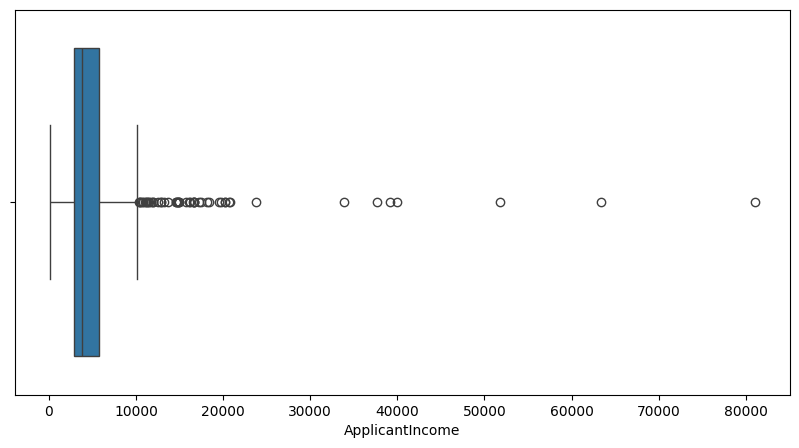

In [47]:
plt.figure(figsize=(13,5))
sns.boxplot(x = 'ApplicantIncome',data = dataset)
plt.show()

C:\Users\PUNEET\AppData\Local\Temp\ipykernel_16648\1976060950.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['ApplicantIncome'])


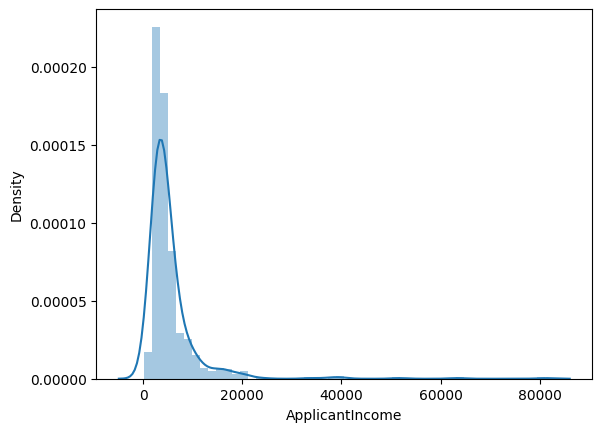

In [38]:
sns.distplot(dataset['ApplicantIncome'])
plt.show()

In [42]:
dataset.shape

(614, 14)

In [44]:
Q1 = dataset['ApplicantIncome'].quantile(0.25)
Q3 = dataset['ApplicantIncome'].quantile(0.75)
Q1, Q3

(np.float64(2877.5), np.float64(5795.0))

In [46]:
IQR = Q3 - Q1
min_range = Q1 - (1.5 * IQR)
max_range = Q3 + (1.5 * IQR)
min_range, max_range

(np.float64(-1498.75), np.float64(10171.25))

In [48]:
new_dataset = dataset[dataset['ApplicantIncome'] <= max_range]

In [49]:
new_dataset.shape

(564, 14)

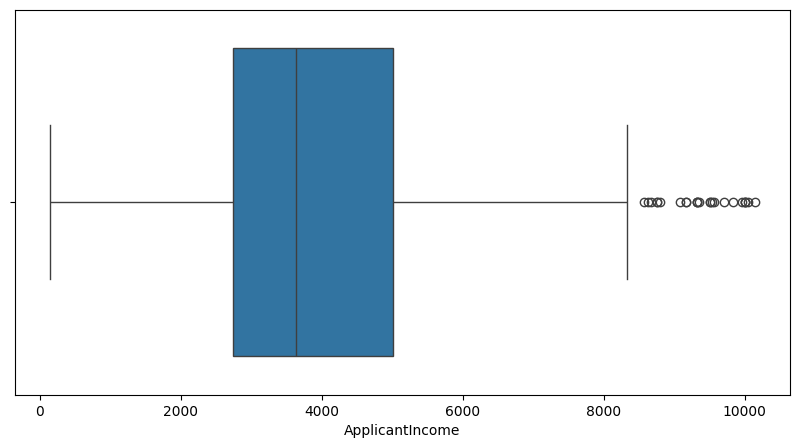

In [50]:
plt.figure(figsize=(10,5))
sns.boxplot(x = 'ApplicantIncome',data = new_dataset)
plt.show()

 # method 2:  using => mean - (3*std)

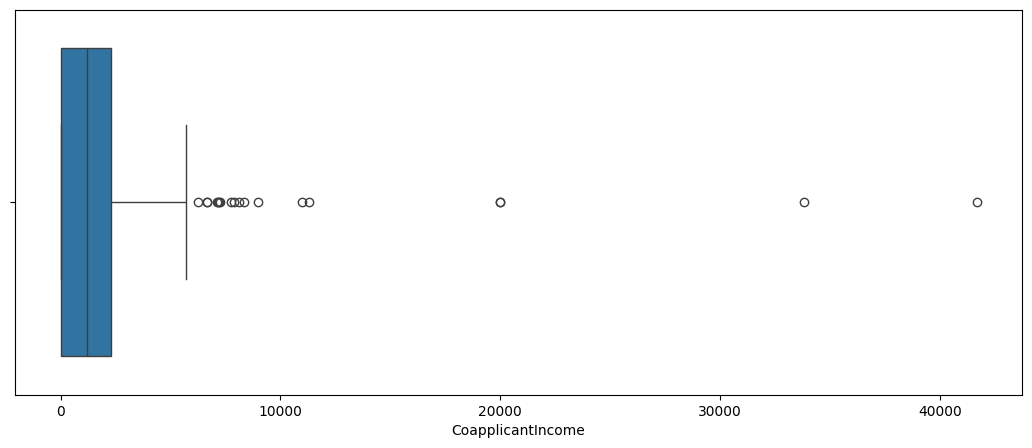

In [51]:
plt.figure(figsize=(13,5))
sns.boxplot(x = 'CoapplicantIncome',data = dataset)
plt.show()

In [52]:
dataset.shape

(614, 14)

In [53]:
min_range = dataset['CoapplicantIncome'].mean() - (3* dataset['CoapplicantIncome'].std())
max_range = dataset['CoapplicantIncome'].mean() + (3* dataset['CoapplicantIncome'].std())
min_range, max_range

(np.float64(-7157.4993096454655), np.float64(10399.990905699668))

In [54]:
new_data = dataset[dataset['CoapplicantIncome']<=max_range]

In [55]:
new_data.shape

(608, 14)

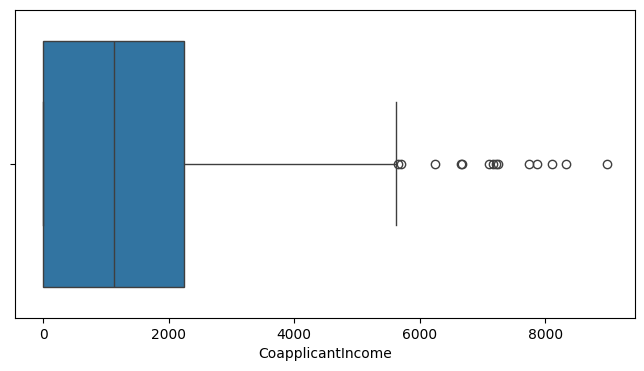

In [58]:
plt.figure(figsize=(8,4))
sns.boxplot(x = 'CoapplicantIncome',data = new_data)
plt.show()

# Feature Scaling (STANDARDIZATION, NORMALIZATION)

In [60]:
# STANDARDIZATION technique
dataset.isnull().sum() # any value in ApplicantIncome & CoapplicantIncome is null so that we use these column

Loan_ID                     0
Gender                     13
Married                     3
Dependents                 15
Education                   0
Self_Employed              32
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                 22
Loan_Amount_Term           14
Credit_History             50
Property_Area               0
Loan_Status                 0
Property_Area_Ordi_encd     0
dtype: int64

C:\Users\PUNEET\AppData\Local\Temp\ipykernel_16648\3932341591.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['ApplicantIncome'])


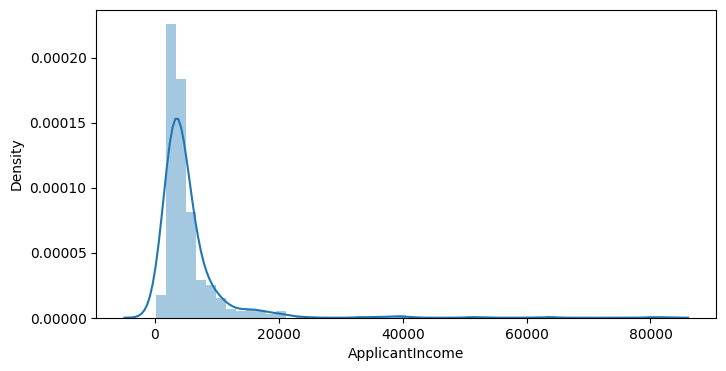

In [76]:
plt.figure(figsize=(8,4))
sns.distplot(dataset['ApplicantIncome'])
plt.show()

In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
ss = StandardScaler()
ss.fit(dataset[['ApplicantIncome']])

StandardScaler()

In [69]:
dataset['ApplicantIncome_ss'] = ss.transform(dataset[['ApplicantIncome']])

In [70]:
dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Property_Area_Ordi_encd,ApplicantIncome_ss
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,2.0,0.072991
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0.0,-0.134412
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,2.0,-0.393747


In [71]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Ordi_encd,ApplicantIncome_ss
count,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000,6.140000e+02
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,1.037459,-4.339634e-18
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.787482,1.000815e+00
min,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000,-8.606493e-01
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000,-4.138159e-01
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000,-2.606393e-01
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,2.000000,6.414426e-02
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,2.000000,1.238462e+01


C:\Users\PUNEET\AppData\Local\Temp\ipykernel_16648\550016556.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['ApplicantIncome'])
C:\Users\PUNEET\AppData\Local\Temp\ipykernel_16648\550016556.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['ApplicantIncome_ss'])


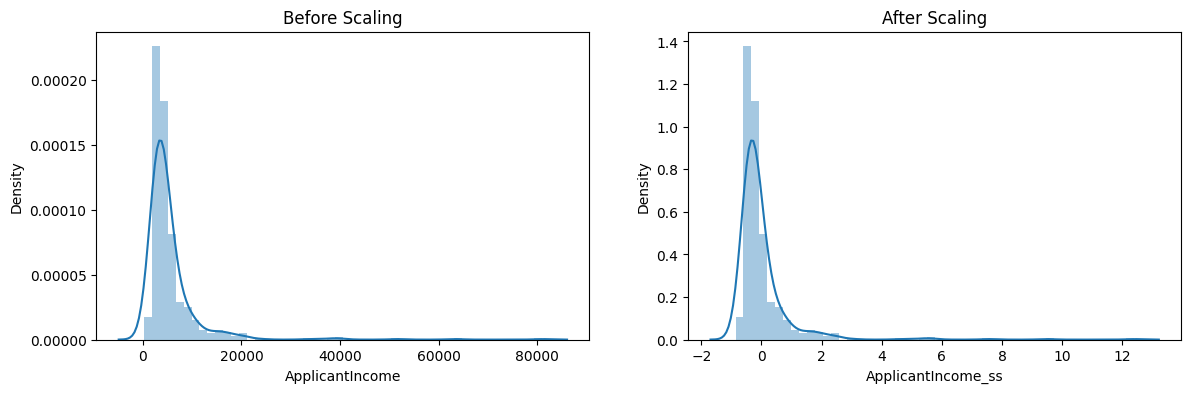

In [79]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
plt.title("Before Scaling")
sns.distplot(dataset['ApplicantIncome'])
plt.subplot(1,2,2)
plt.title("After Scaling")
sns.distplot(dataset['ApplicantIncome_ss'])
plt.show()

# feature scaling => using normalization (min - max)